# Part II - (Ford GoBike Exploration)
## by (Toyyib Adelakun)


## Investigation Overview


In this analysis, I would like to figure that when and where are most trips taken, and what kind of characteristics are observed on a daily and weekly Trip duration. The characteristics include rider's attributes (sex, and user_type) and duration of trips.


## Dataset Overview

The dataset consists of 183412 rows × 16 columns. In the other words, this dataset has 183412 observations and 16 variables.

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('ford.csv')
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,month,start_day,end_date,hour,duration_min,duration_hr,Age,distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,February,Thursday,Friday,17,869.750000,14.495833,38.0,0.005067
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,No,February,Thursday,Friday,18,708.683333,11.811389,37.0,0.015730
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,February,Thursday,Friday,12,1030.900000,17.181667,50.0,0.027784


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Trip Duration

Trip duration  has a long-tailed distribution, with a lot of short trip time, and few on the long trip time. When plotted on a log-scale, the Trip duration  distribution has a bell curve shape, with the peak between 3mins and 30mins.


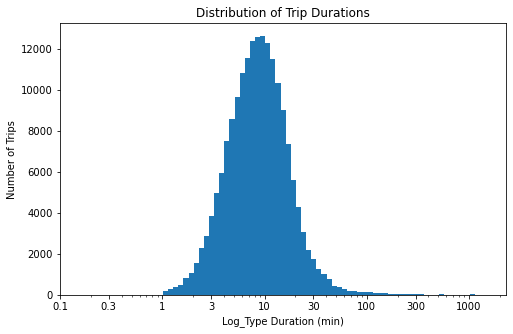

In [4]:
plt.figure(figsize=[8, 5])
binsize = 0.05
bins = 10 ** np.arange(0.007, 3.2+binsize, binsize)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.title('Distribution of Trip Durations')
plt.xlabel('Log_Type Duration (min)')
plt.ylabel('Number of Trips')
plt.xticks(ticks, labels);

## Popoular Hour of Day 

The use of bike services is the most during peak hours(0800hrs and 1700hrs) which implies the resumption and closing hours of a weekday.

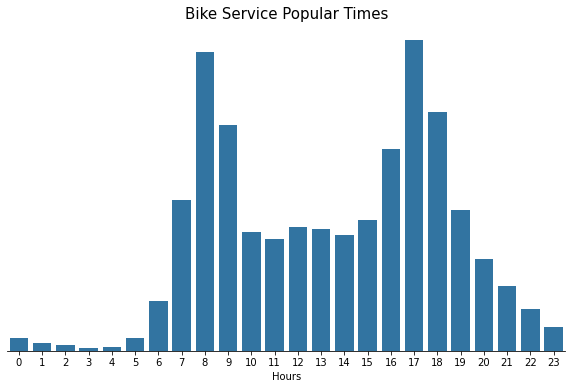

In [17]:
# Popular time(hour) of the day more bike service was reequested
hour_order = np.arange(0,24)
base_color = sns.color_palette()[0]
plt.figure(figsize=(10,6))
plt.title('Bike Service Popular Times', fontsize=15)
ax = sns.countplot(data=df, x='hour', order=hour_order, color=base_color)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')
plt.xlabel('Hours');

## Duration vs Gender

Plotting Duration Trip and Gender on a boxplot also trimming duration to max 2500 sec to get clearer picture,shows that higher percentage of female and other rides longer trips then males. Though quantity of male riders are very high then other and female 

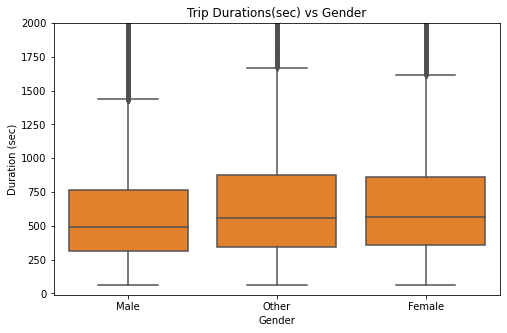

In [15]:
plt.figure(figsize = [8, 5])
base_color = sns.color_palette()[1]
sns.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2000])
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.title('Trip Durations(sec) vs Gender')
plt.show()

## Duration vs User_Type

Plotting Duration Trip and user_type (customers or subscibers) on a boxplot also trimming duration to max 2500 sec to get clearer picture,shows that higher percentage of customers are taking longer trips then compared to subscribers.

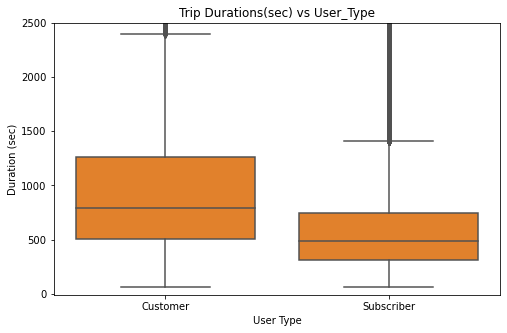

In [16]:
plt.figure(figsize = [8, 5])
base_color = sns.color_palette()[1]
sns.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2500])
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.title('Trip Durations(sec) vs User_Type')
plt.show();

## Trip Duration by User_type and Trip Start_day

Subscribers tends to have stable Trip duration usage on a daily basis as compared to  Customers with flexible trip duration(having thier highest trip duration over the week end)

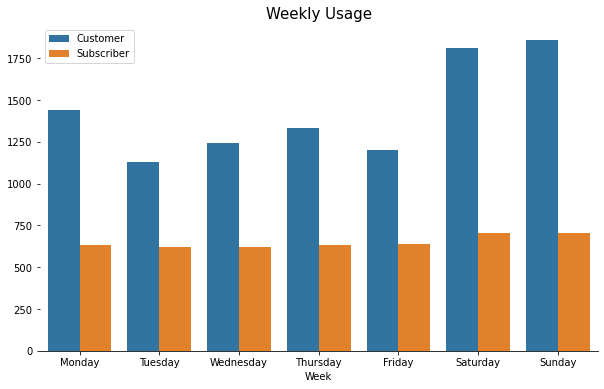

In [19]:
# user weekly Trip dUration

#  Days of the week
start_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']

# Returns the Days of the week with the categories and orderedness
days = pd.api.types.CategoricalDtype(ordered=True, categories=start_day)

# Use pandas.astype() to convert the "start_day" column from a plain object type into an ordered categorical type 
df['start_day'] = df['start_day'].astype(days);

plt.figure(figsize=(10,6))
plt.title('Weekly Usage', fontsize=15)
chart = sns.barplot(data=df, x='start_day', y='duration_sec', hue='user_type', ci=None)

chart.set(xlabel='Week', ylabel='')

# Remove legend title
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

## Trip Duration by User_type and Hour of the Day

Subscribers tends to have stable Trip duration usage on a daily basis but abit high trip duration at the early hour of the day as compared to  Customers with flexible trip duration customer  aslo tend to have high trip duration at the early hour of the day (3AM)

Both User_type to ride longer during the early hour of the day  (probably cheaper)

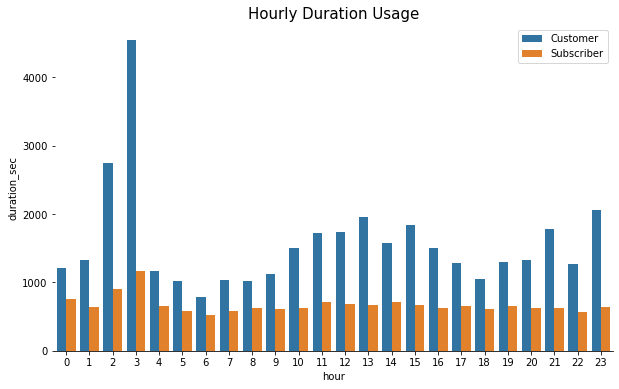

In [20]:
# user daily(hour of the day) Trip duration 
plt.figure(figsize=(10,6))
plt.title('Hourly Duration Usage', fontsize=15)
sns.barplot(data=df, x='hour', y='duration_sec', ci=None, hue='user_type')

chart.set(xlabel='Hour', ylabel='')

# Remove legend title
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
